<a href="https://colab.research.google.com/github/kakkia/training_projects/blob/main/Sampling_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()
     

Saving spotify_data.csv to spotify_data.csv


In [3]:
spotify_data = pd.read_csv("spotify_data.csv")
spotify_data.head()

,tempo,danceability,energy,instrumentalness,liveness,valence
0,156.985,0.831,0.814,0.013400,0.0556,0.3890
1,115.080,0.719,0.493,0.000000,0.1180,0.1240
2,218.050,0.850,0.893,0.000004,0.3720,0.0391
3,186.948,0.476,0.781,0.000000,0.1140,0.1750
4,147.988,0.798,0.624,0.000000,0.1660,0.5910


In [4]:
# For this project, we are going to focus on the tempo variable

song_tempos = spotify_data["tempo"]

In [5]:
song_tempos

0        156.985
1        115.080
2        218.050
3        186.948
4        147.988
          ...   
42300    150.013
42301    149.928
42302    154.935
42303    150.042
42304    155.047
Name: tempo, Length: 42305, dtype: float64

In [6]:
# Declared functions 

def choose_statistic(x, sample_stat_text):
  # calculate mean if the text is "Mean"
  if sample_stat_text == "Mean":
    return np.mean(x)
  # calculate minimum if the text is "Minimum"
  elif sample_stat_text == "Minimum":
    return np.min(x)
  # calculate variance if the text is "Variance"
  elif sample_stat_text == "Variance":
    return np.var(x, ddof=1)
  # if you want to add an extra stat
  # raise error if sample_stat_text is not "Mean", "Minimum", or "Variance"
  else:
    raise Exception('Make sure to input "Mean", "Minimum", or "Variance"')

def population_distribution(population_data):
  # plot the population distribution
  sns.histplot(population_data, stat='density')
  # informative title for the distribution 
  plt.title(f"Population Distribution")
  # remove None label
  plt.xlabel('')
  plt.show()
  plt.clf()

def sampling_distribution(population_data, samp_size, stat):
  # list that will hold all the sample statistics
  sample_stats = []
  for i in range(500):
    # get a random sample from the population of size samp_size
    samp = np.random.choice(population_data, samp_size, replace = False)
    # calculate the chosen statistic (mean, minimum, or variance) of the sample
    sample_stat = choose_statistic(samp, stat)
    # add sample_stat to the sample_stats list
    sample_stats.append(sample_stat)
  
  pop_statistic = round(choose_statistic(population_data, stat),2)
  # plot the sampling distribution
  sns.histplot(sample_stats, stat='density')
  # informative title for the sampling distribution
  plt.title(f"Sampling Distribution of the {stat} \nMean of the Sample {stat}s: {round(np.mean(sample_stats), 2)} \n Population {stat}: {pop_statistic}")
  plt.axvline(pop_statistic,color='g',linestyle='dashed', label=f'Population {stat}')
  # plot the mean of the chosen sample statistic for the sampling distribution
  plt.axvline(np.mean(sample_stats),color='orange',linestyle='dashed', label=f'Mean of the Sample {stat}s')
  plt.legend()
  plt.show()
  plt.clf()

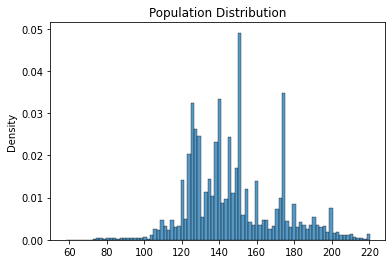

<Figure size 432x288 with 0 Axes>

In [7]:
# Plot the population distribution with the mean labeled

population_distribution(song_tempos)

The population distribution is approximately normal with a little bit of right-skewness.

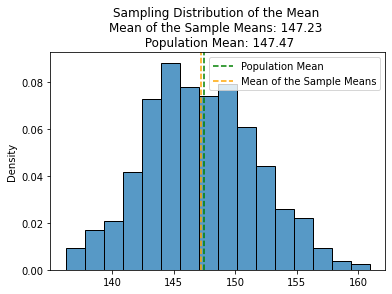

<Figure size 432x288 with 0 Axes>

In [8]:
# Sampling distribution of the sample mean
sampling_distribution(song_tempos, 30, "Mean")

The mean is also an unbiased estimator as the mean of the sampling distribution of the mean is always approximately the same as the population mean.

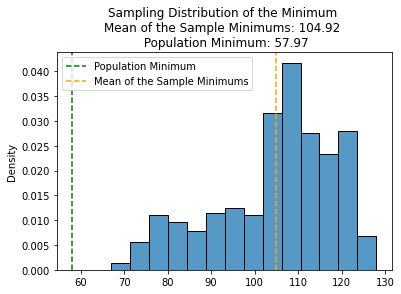

<Figure size 432x288 with 0 Axes>

In [9]:
# Sampling distribution of the sample minimum
sampling_distribution(song_tempos, 30, "Minimum")

The mean of the sample minimums is consistently much higher than the population minimum. Since you are looking for high-tempo songs for the party, this is actually a good thing: you will want to avoid having a lot of low-tempo songs.

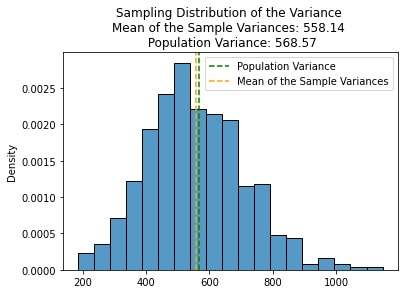

<Figure size 432x288 with 0 Axes>

In [10]:
# Sampling distribution of the sample variance
sampling_distribution(song_tempos, 30, "Variance")

The mean of the sample variances is consistently slightly less than the population variance, meaning it is a biased estimator. Sample variance becomes an unbiased estimator of the population variance.

In [11]:
# Calculate the population mean and standard deviation

population_mean = song_tempos.mean()
population_std = song_tempos.std()

In [12]:
# Calculate the standard error

standard_error = population_std / (30**.5)

In [13]:
# Calculate the probability of observing an average tempo of 140bpm or lower from a sample of 30 songs

stats.norm.cdf(140, population_mean, standard_error)

0.04300540443699053

In [14]:
# Calculate the probability of observing an average tempo of 150bpm or higher from a sample of 30 songs

1 - stats.norm.cdf(150, population_mean, standard_error)

0.28088259300283225